In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [14]:
start = '2010-01-01'
end   = '2022-12-31'
stock= 'GOOG'
df=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313


In [16]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600
2022-12-29,87.029999,89.364998,86.989998,88.949997,88.949997,18280700
2022-12-30,87.364998,88.830002,87.029999,88.730003,88.730003,19190300


In [17]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313


In [18]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,15.615220,15.678981,15.547723,15.610239,78541293
1,15.620949,15.637387,15.480475,15.541497,120638494
2,15.588072,15.588072,15.102393,15.149715,159744526
3,15.178109,15.193053,14.760922,14.797037,257533695
4,14.744733,15.024933,14.672753,14.994298,189680313


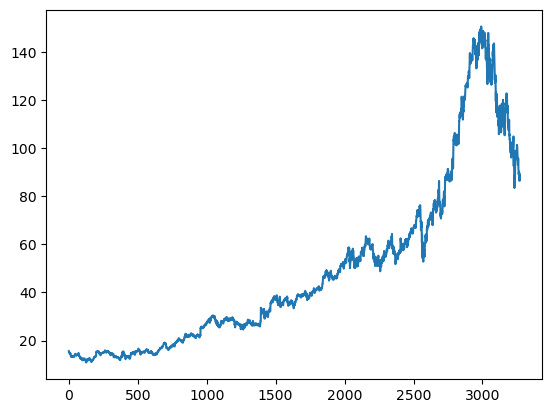

In [19]:
plt.plot(df.Close)

In [22]:
m100=df.Close.rolling(100).mean()
m100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    101.9020
3268    101.5926
3269    101.2750
3270    100.9831
3271    100.6954
Name: Close, Length: 3272, dtype: float64

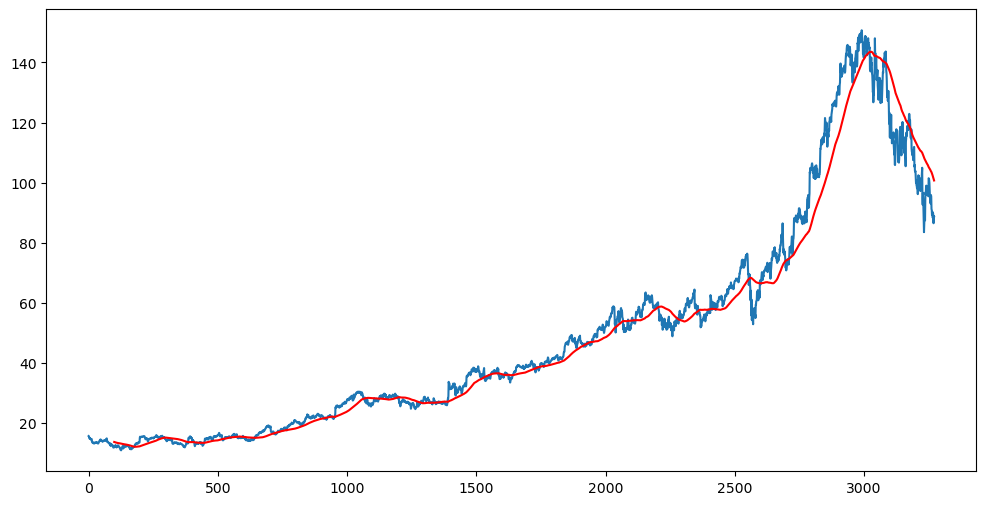

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(m100,'r')

In [24]:
m200=df.Close.rolling(200).mean()
m200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    110.950400
3268    110.737673
3269    110.536268
3270    110.332715
3271    110.107912
Name: Close, Length: 3272, dtype: float64

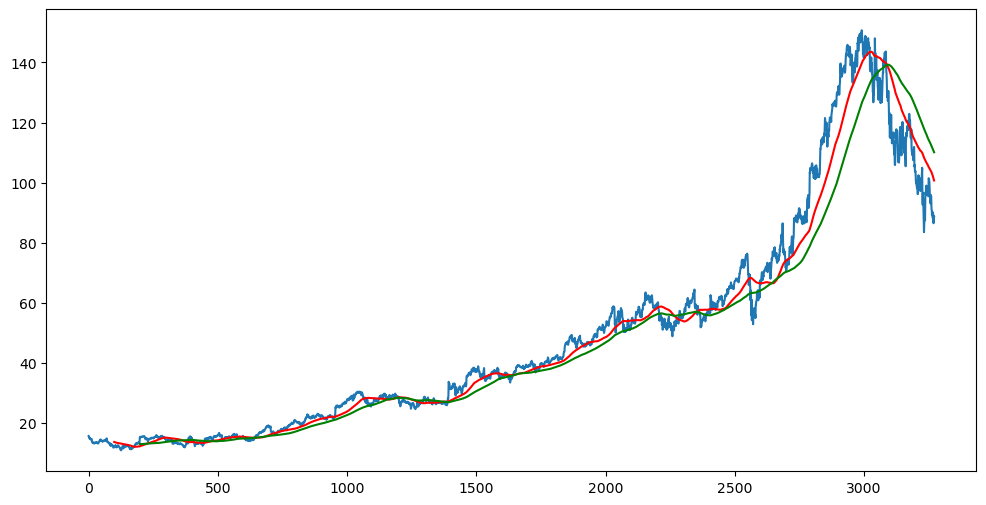

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(m100,'r')
plt.plot(m200,'g')

In [31]:
training_data=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
testing_data=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(training_data.shape)
print(testing_data.shape)

(2290, 1)
(982, 1)


In [32]:
training_data.head()

,Close
0,15.610239
1,15.541497
2,15.149715
3,14.797037
4,14.994298


In [33]:
testing_data.head()

,Close
2290,54.752998
2291,54.750500
2292,56.068501
2293,56.007999
2294,56.083500


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [36]:
training_data_array=scaler.fit_transform(training_data)
training_data_array

array([[0.09036547],
       [0.08905749],
       [0.08160285],
       ...,
       [0.88360866],
       [0.85434437],
       [0.83862763]])

In [37]:
x_train=[]
y_train=[]

for i in range(100,training_data_array.shape[0]):
    x_train.append(training_data_array[i-100:i])
    y_train.append(training_data_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [38]:
x_train.shape

(2190, 100, 1)

In [94]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [95]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(.4))


model.add(LSTM(units=120,activation='relu',return_sequences=True))
model.add(Dropout(.5))

model.add(Dense(units=1))

In [47]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100, 120)        

In [49]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
69/69 [==============================] - 25s 254ms/step - loss: 0.0938
Epoch 2/50
69/69 [==============================] - 21s 300ms/step - loss: 0.0797
Epoch 3/50
69/69 [==============================] - 21s 305ms/step - loss: 0.0780
Epoch 4/50
69/69 [==============================] - 18s 261ms/step - loss: 0.0771
Epoch 5/50
69/69 [==============================] - 18s 259ms/step - loss: 0.0765
Epoch 6/50
69/69 [==============================] - 19s 278ms/step - loss: 0.0772
Epoch 7/50
69/69 [==============================] - 19s 282ms/step - loss: 0.0766
Epoch 8/50
69/69 [==============================] - 23s 339ms/step - loss: 0.0755
Epoch 9/50
69/69 [==============================] - 20s 287ms/step - loss: 0.0757
Epoch 10/50
69/69 [==============================] - 20s 295ms/step - loss: 0.0752
Epoch 11/50
69/69 [==============================] - 19s 271ms/step - loss: 0.0755
Epoch 12/50
69/69 [==============================] - 17s 251ms/step - loss: 0.0751
Epoch 13/50
6

In [50]:
model.save('keras_model.h5')

E:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
past_100_days=training_data.tail(100)

In [77]:
final_df =pd.concat([past_100_days,testing_data],ignore_index=True)


In [78]:
final_df.head()

,Close
0,58.626499
1,57.802502
2,58.061001
3,58.554501
4,59.343498


In [79]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0963267 ],
       [0.08824021],
       [0.09077705],
       ...,
       [0.36947731],
       [0.39391349],
       [0.39175453]])

In [100]:
input_data.shape

(1082, 1)

In [111]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [112]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [113]:
y_predicted=model.predict(x_test)

31/31 [==============================] - 3s 96ms/step


In [114]:
y_predicted.shape

(982, 100, 1)

In [92]:
scaler.scale_

array([0.00981374])

In [87]:
scale_factor=1/0.00981374
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

ValueError: x and y can be no greater than 2D, but have shapes (982,) and (982, 100, 1)

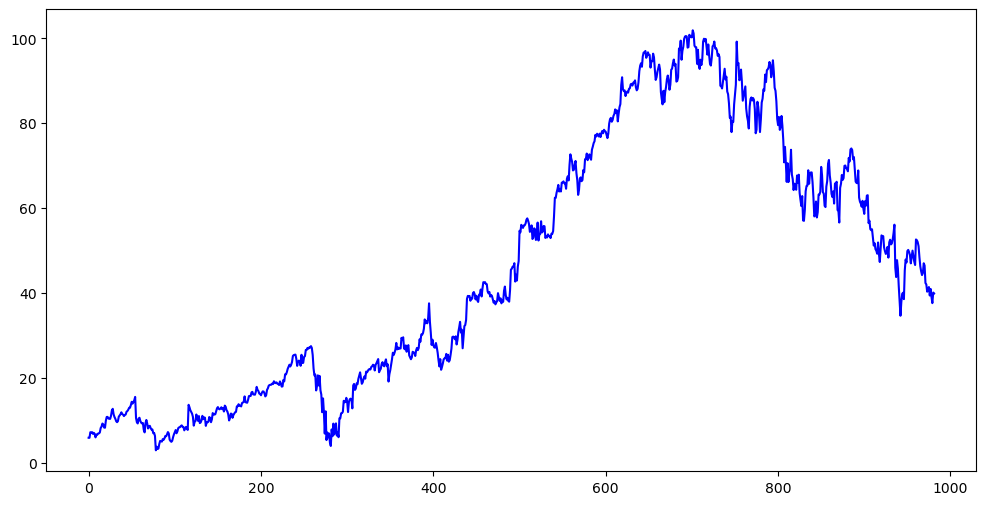

In [89]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()